## Outliers And Impact On Machine Learning!!

##### Which Machine Learning Models Are Sensitive To Outliers?
    1. Naivye Bayes Classifier--- Not Sensitive To Outliers
    2. SVM----------------------- Not Sensitive To Outliers
    3. Linear Regression------------- Sensitive To Outliers
    4. Logistic Regression------------Sensitive To Outliers
    5. Decision Tree Regressor or Classifier--Not Sensitive
    6. Ensemble(RF,XGboost,GB)------- Not Sensitive
    7. KNN--------------------------- Not Sensitive
    8. Kmeans------------------------ Sensitive
    9. Hierarichal------------------- Sensitive
    10. PCA-------------------------- Sensitive
    11. Neural Networks-------------- Sensitive

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
import seaborn as sns

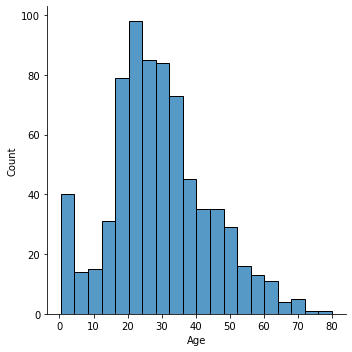

In [3]:
sns.displot(df['Age'].dropna())

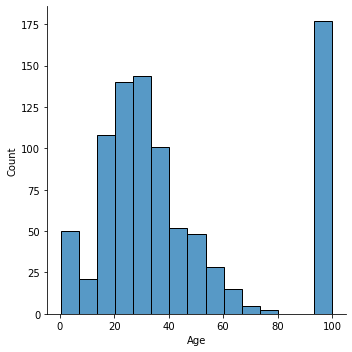

In [4]:
sns.displot(df['Age'].fillna(100))

## Gaussian Distributed

Text(0, 0.5, 'No of passenger')

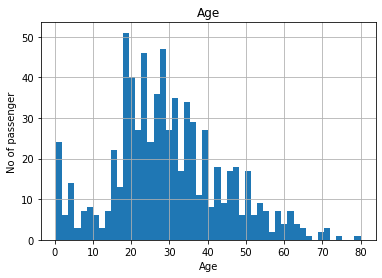

In [5]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

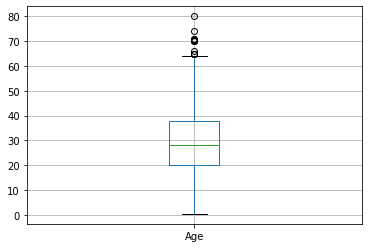

In [6]:
figure=df.boxplot(column='Age')

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### If The Data Is Normally Distributed We use this

In [8]:
## Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
upper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

## If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

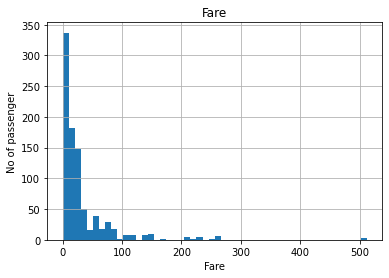

In [12]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

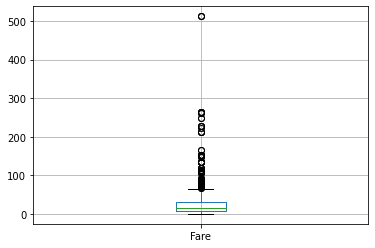

In [13]:
df.boxplot(column='Fare')

In [14]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
### Lets compute the Interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [16]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [17]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [18]:
data=df.copy()

In [19]:
data.loc[data['Age']>=73,'Age']=73

Text(0, 0.5, 'No of passenger')

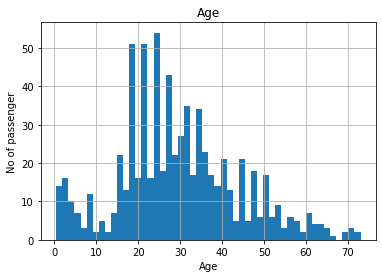

In [29]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [24]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

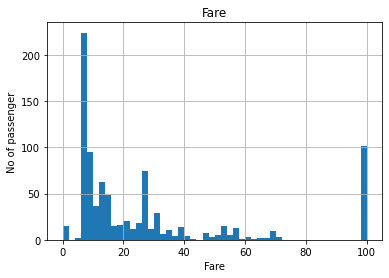

In [28]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [35]:
from sklearn.model_selection import train_test_split
## we removing NaN with 0(lower_bridge) because we removed outliers with end of distribution(upper_bridge)
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3) 

In [36]:
## logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test,y_pred)))
print('Roc_Auc_Score : {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score : 0.6902985074626866
Roc_Auc_Score : 0.6947115384615384


In [50]:
## logistic Regression
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
from sklearn.metrics import accuracy_score,roc_auc_score
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test,y_pred)))
print('Roc_Auc_Score : {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score : 0.6455223880597015
Roc_Auc_Score : 0.7089587242026267
